In [1]:
import numpy as np, basic, cosmology, local, tools_multitracer as mass, plottools as pl, constant
from matplotlib.pyplot import *
cr = rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
zmin, zmax = 0.0001, 50.
zn  = 10000
zi  = np.linspace(zmin,zmax,zn)
dz  = zi[1]-zi[0]
Hzi = basic.cosmofuncs.hubble(zi,divc=True,**local.cps)
rzi = basic.cosmofuncs.dist_comoving(zi,**local.cps)

### Setup survey parameters

In [3]:
# CIB
#nu = 535.
nu = 353.

In [4]:
zbn  = {'euc':5,'lss':5}
bias = {'euc':np.sqrt(1.+zi),'lss':1+.84*zi}

In [5]:
zbin, dndzi, pz, frac = mass.galaxy_distribution(zi,zbn=zbn)

### Compute weight

In [6]:
w = {}

In [7]:
w['W1'] = cosmology.window_cib(rzi,zi,nu)/Hzi

In [8]:
# galaxy
N = 2
for s in ['euc','lss']:
    for zid in range(zbn[s]):
        w['W'+str(N)] = dndzi[s]*pz[s][zid]
        N += 1
print(w.keys())

dict_keys(['W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11'])


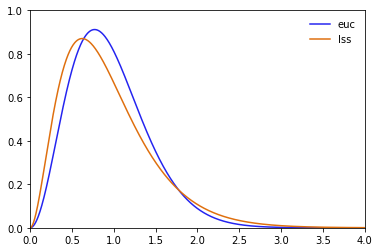

In [9]:
xlim(0,4)
ylim(0,1)
for s in ['euc','lss']:
    plot(zi,dndzi[s],label=s)
legend()

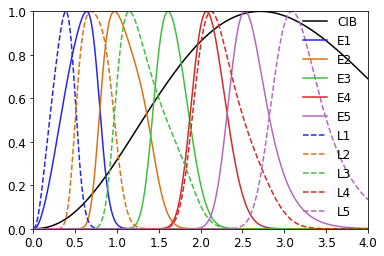

In [18]:
xlim(0,4)
ylim(0,1)
for I, m in enumerate(w.keys()):
    if I == 0:  co, ls, la = 'k', '-', 'CIB'
    if I >= 1 and I < zbn['euc']+1:  co, ls, la = cr[I-1], '-', 'E'+str(I)
    #if I >= 1 and I < zbn['euc']+1:  continue
    if I >= zbn['euc']+1 and I < zbn['euc']+zbn['lss']+1:  co, ls, la = cr[I-1-zbn['euc']], '--', 'L'+str(I-zbn['euc'])
    plot(zi,w[m]/np.max(w[m]),label=la,color=co,ls=ls)
legend()

### Read Precomputed Cl

In [11]:
lmax = 2048
l, camb_cls = mass.read_camb_cls(add_euc=zbn['euc'],add_lss=zbn['lss'])

In [12]:
klist = mass.tracer_list(add_euc=zbn['euc'], add_lss=zbn['lss'])

### Plots

In [13]:
ncib = mass.get_covariance_noise(lmax,add_cmb=[],add_euc=0,add_lss=0)

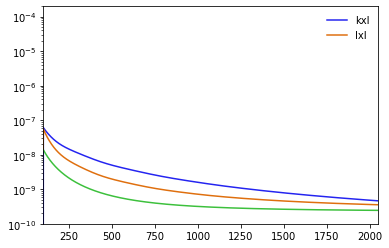

In [14]:
xlim(100,lmax)
ylim(1e-10,2e-4)
MJy = constant.MJysr2uK(nu)/constant.Tcmb
yscale('log')
plot(l[2:],camb_cls['klbcib'][2:]/MJy,label='kxI')
plot(l[2:],camb_cls['cibcib'][2:]/MJy**2+ncib[0,0,2:]/MJy**2,label='IxI')
plot(l[2:],ncib[0,0,2:]/MJy**2)
legend()

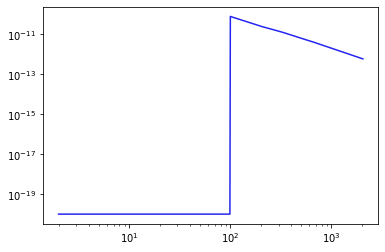

In [15]:
loglog(l[2:],camb_cls["klbcib"][2:])

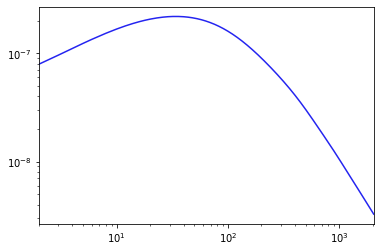

In [16]:
xlim(2,lmax)
loglog(l[2:],camb_cls["klbklb"][2:])

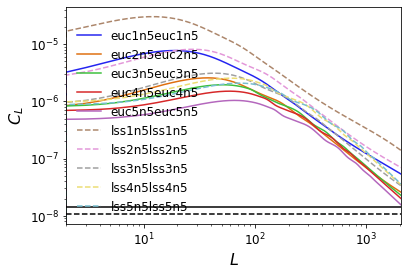

In [17]:
pl.plot_1dstyle(xlog=True,ylog=True,xmin=2,xmax=lmax)
for I, m0 in klist.items():
    for J, m1 in klist.items():
        if I>J: continue
        if not ( 'euc' in m0 and 'euc' in m1 and m0==m1 ) : continue
        plot(l,camb_cls[m0+m1],label=m0+m1)
for I, m0 in klist.items():
    for J, m1 in klist.items():
        if I>J: continue
        if not ( 'lss' in m0 and 'lss' in m1 and m0==m1 ) : continue
        plot(l,camb_cls[m0+m1],label=m0+m1,ls='--')
axhline(1./((30./zbn['euc'])*(10800./np.pi)**2),color='k')
axhline(1./((40./zbn['lss'])*(10800./np.pi)**2),color='k',ls='--')
legend()